In [ ]:
# !pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage import io

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def kmeans_segmentation_subplot(image, title="Image"):
    k_values = [2, 3, 10]
    len_k = len(k_values)

    fig, axes = plt.subplots(1, len_k+1, figsize=(4*(len_k+1), 4))
    fig.suptitle(f"K-Means Segmentation - {title}", fontsize=14)

    axes[-1].imshow(image)
    axes[-1].set_title("Original")
    axes[-1].axis("off")


    for i, k in enumerate(k_values):
        if image.ndim == 2:
            pixel_values = image.reshape((-1, 1))  # Grayscale
        else:
            pixel_values = image.reshape((-1, image.shape[-1]))  # RGB
        pixel_values = np.float32(pixel_values)

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pixel_values)
        labels = kmeans.labels_

        segmented_image = labels.reshape(image.shape[0], image.shape[1])

        cmap = plt.cm.get_cmap("tab10", k)
        im = axes[i].imshow(segmented_image, cmap=cmap, vmin=0, vmax=k - 1)
        axes[i].set_title(f"K={k}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


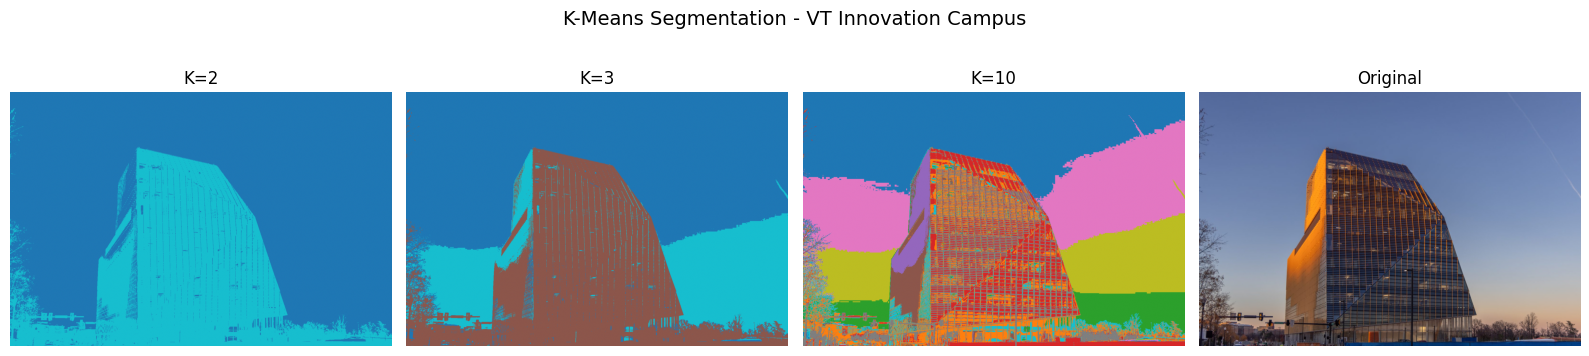

In [ ]:
# Image Case 1
image = io.imread("vt_icab.jpg")
kmeans_segmentation_subplot(image, title="VT Innovation Campus")

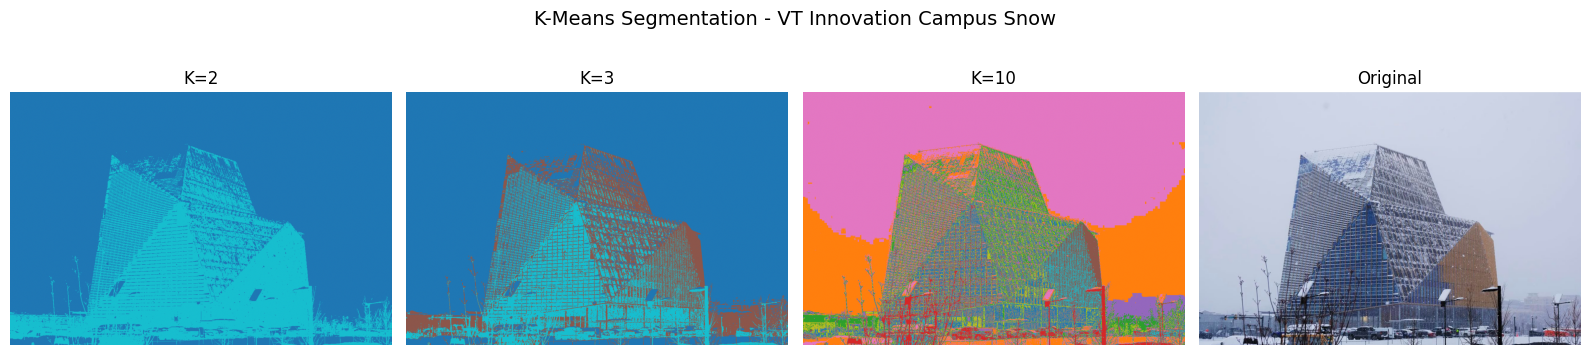

In [ ]:
# Image Case 2
image = io.imread("vt_icab_snow.jpg")
kmeans_segmentation_subplot(image, title="VT Innovation Campus Snow")

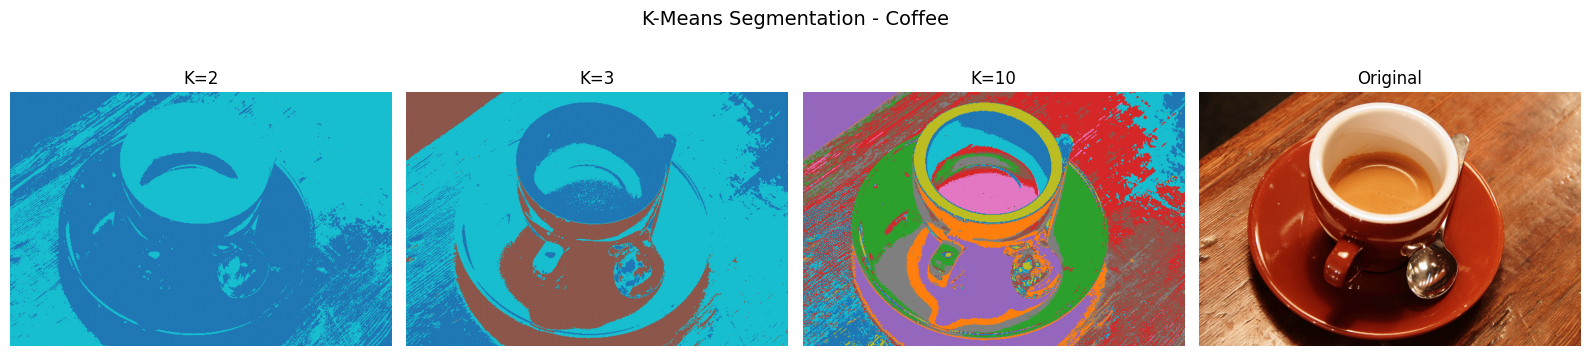

In [ ]:
# Image Case 3
coffee_img = data.coffee()
kmeans_segmentation_subplot(coffee_img, title="Coffee")

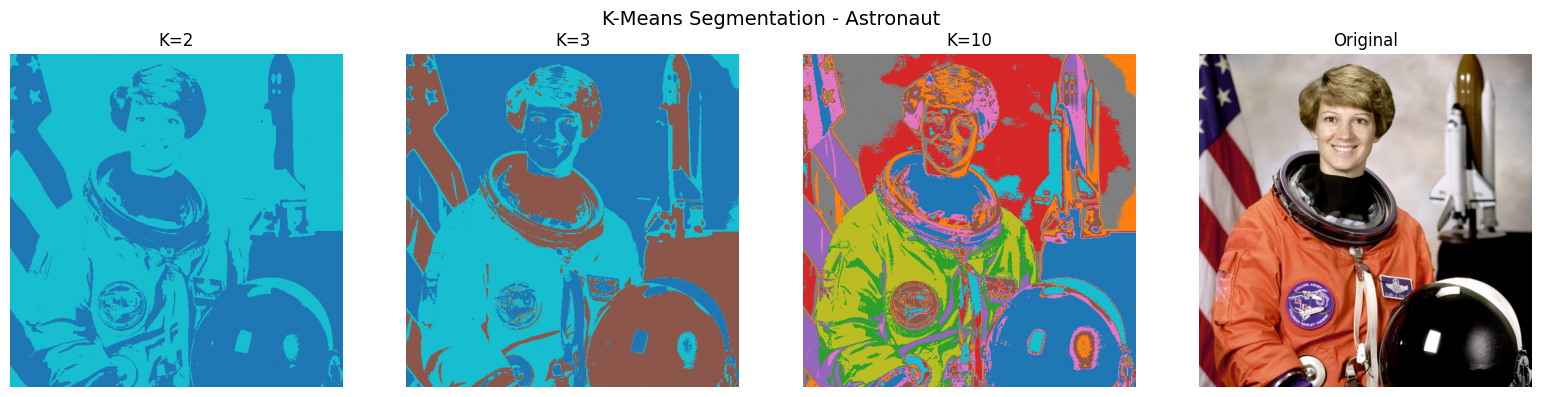

In [ ]:
# Image Case 4
astronaut_img = data.astronaut()
kmeans_segmentation_subplot(astronaut_img, title="Astronaut")

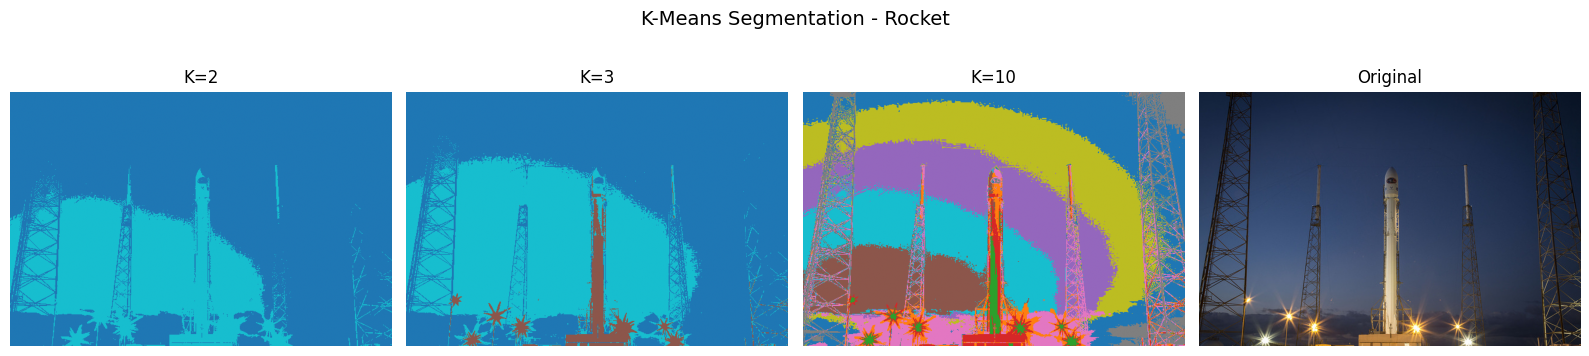

In [ ]:
# Image Case 5
rocket_img = data.rocket()
kmeans_segmentation_subplot(rocket_img, title="Rocket")